In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import time
import copy
import os

import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T




In [2]:
CUDA_LAUNCH_BLOCKING=1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft_eval = models.resnet18(pretrained=True)
num_ftrs = model_ft_eval.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft_eval.fc = nn.Linear(num_ftrs, 6)

model_ft_eval = model_ft_eval.to(device)

model_ft_eval.load_state_dict(torch.load('model_ft.pth'))
model_ft_eval.eval()

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'val':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}


In [3]:


def infer(image_path):
    img = read_image(image_path)

    img = T.ToPILImage()(img)
    img.show()

    x = data_transforms['train']
    tensor = x(img)
    tensor = tensor.unsqueeze(0) 
    tensor = tensor.cuda()
    softmax = nn.Softmax()
    outputs = model_ft_eval(tensor)
    preds = torch.max(softmax(outputs), 1).indices
    class_mapping = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F'}
    print("The image belongs to class", class_mapping[preds.item()])

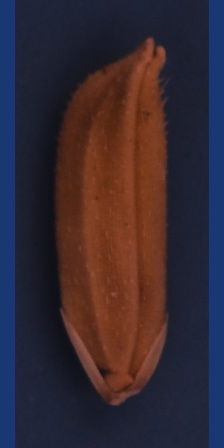

The image belongs to class F


/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [4]:
infer('img_1630045675674.jpg_ext0.jpg')